# Logistic Regression exercise

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [2]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
print('the imgs shape: ', imgs.shape)
print('the labels shape: ', labels.shape)

the imgs shape:  (42000, 784)
the labels shape:  (42000,)


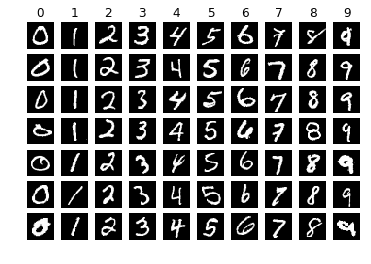

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(10)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [19]:
# transform the labels to binary
for i in range(len(labels)):
    if labels[i] != 0:
        labels[i] = 1
        
# 2/3 training set
# 1/3 test set
split_index = int(len(labels) * 2 / 3)
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
print(X_train.shape)
print(X_test.shape)

(28000, 785)
(14000, 785)


In [20]:
X_train_feats = X_train # choose and extract features
X_test_feats = X_test # choose and extract features

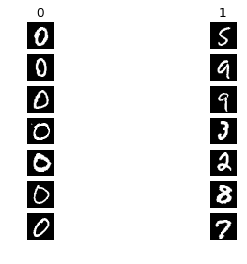

In [6]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [21]:
from DSVC.classifiers import LogisticRegression

# Start training. 
# You should open DSVC/classifiers/logistic_regression.py and implement the function.
# Then run this cell.

classifier = LogisticRegression()

loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 0.000001,
    num_iters = 2000,
    batch_size = 30,
)

iteration 0 / 2000: loss 0.627436
iteration 100 / 2000: loss 0.138732
iteration 200 / 2000: loss 0.124666
iteration 300 / 2000: loss 0.175952
iteration 400 / 2000: loss 0.310562
iteration 500 / 2000: loss 0.015453
iteration 600 / 2000: loss 0.013490
iteration 700 / 2000: loss 0.040634
iteration 800 / 2000: loss 0.089720
iteration 900 / 2000: loss 0.012557
iteration 1000 / 2000: loss 0.069571
iteration 1100 / 2000: loss 0.006634
iteration 1200 / 2000: loss 0.091338
iteration 1300 / 2000: loss 0.032447
iteration 1400 / 2000: loss 0.023422
iteration 1500 / 2000: loss 0.038809
iteration 1600 / 2000: loss 0.009298
iteration 1700 / 2000: loss 0.011662
iteration 1800 / 2000: loss 0.005872
iteration 1900 / 2000: loss 0.018462


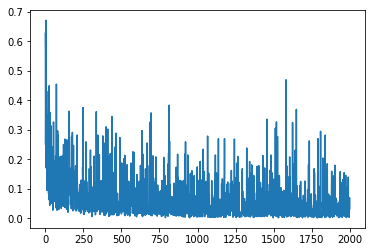

In [22]:
plt.plot(loss_history)

In [23]:
y_test_pred = classifier.predict(X_test_feats)
print("The accuracy socre is ", np.mean(y_test == y_test_pred))

The accuracy socre is  0.9875714285714285


you should get the accuracy higher than 96%.

----

### F1-Measure
Notice that, if our model always output '1', totally ignoring the input X, we can get a accuracy 90%.So, in this assignment, accuracy is not efficient enough. 

We will use F1-Measure to evaluate our model.

You may need this:
[F1-Measure](https://baike.baidu.com/item/f-measure/913107?fr=aladdin)

In [24]:
# Calculate the precision(准确率), recall(召回率) and F1
# important： We should consider label '0' as 'positive' here. 
# That means 'True positive' ==> '(y_test == 0) and (y_test_pred == 0)'

#######Your code here########
tp,fp,fn = 0,0,0
for i in range(len(y_test_pred)):
    if(y_test[i] == y_test_pred[i] and y_test[i] == 0):
        tp = tp + 1
for i in range(len(y_test_pred)):
    if(y_test[i] != y_test_pred[i] and y_test[i] == 1 and y_test_pred[i] == 0):
        fp = fp + 1
for i in range(len(y_test_pred)):
    if(y_test[i] != y_test_pred[i] and y_test[i] == 0 and y_test_pred[i] == 1):
        fn = fn + 1        
precision = tp / (tp + fp)# 精准率代表我们预测的所有结果中预测正确的占比
recall = tp / (tp + fn)# 召回率代表算法能够从实际发生的结果中正确挑出的占比
print(precision)
print(recall)
print('F1:', precision*recall*2/(precision+recall))

0.9440057430007178
0.9319631467044649
F1: 0.9379457917261055


you should get the F1 higher than 85%.

# Multiclass classification

Now, we use the Logistic Regression to classification handwritten digits. There are 10 class, from '0' to '9'.


Hint: The method "one vs all" may helpful. [Here is the introduction to "one vs all"](https://msdn.microsoft.com/library/en-us/Dn905887.aspx). 

In [118]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
        
# 2/3 training set
# 1/3 test set
split_index = int(len(labels) * 2 / 3)
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
print(y_train)

print(X_train.shape)
print(X_test.shape)

[1 0 1 ... 8 0 7]
(28000, 785)
(14000, 785)


In [124]:
X_train_feats = X_train # choose and extract features
X_test_feats = X_test # choose and extract features

In [145]:
# Start training. 
# You should update your code in DSVC/classifiers/logistic_regression.py .
# Then run this cell.

classifier = LogisticRegression()
loss_history = classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 5e-6,
    num_iters = 10000,
    batch_size = 30,
)

class 0 iteration 0 / 10000: loss 1.256578
class 0 iteration 2000 / 10000: loss 0.056043
class 0 iteration 4000 / 10000: loss 0.037977
class 0 iteration 6000 / 10000: loss 0.007781
class 0 iteration 8000 / 10000: loss 0.023058
class 1 iteration 0 / 10000: loss 1.164951
class 1 iteration 2000 / 10000: loss 0.042294
class 1 iteration 4000 / 10000: loss 0.148706
class 1 iteration 6000 / 10000: loss 0.014002
class 1 iteration 8000 / 10000: loss 0.019788
class 2 iteration 0 / 10000: loss 1.396547
class 2 iteration 2000 / 10000: loss 0.118992
class 2 iteration 4000 / 10000: loss 0.041019
class 2 iteration 6000 / 10000: loss 0.056891
class 2 iteration 8000 / 10000: loss 0.155125
class 3 iteration 0 / 10000: loss 1.276252
class 3 iteration 2000 / 10000: loss 0.091035
class 3 iteration 4000 / 10000: loss 0.160877
class 3 iteration 6000 / 10000: loss 0.052124
class 3 iteration 8000 / 10000: loss 0.239022
class 4 iteration 0 / 10000: loss 1.401194
class 4 iteration 2000 / 10000: loss 0.129165
cla

绘制前五个分类器loss衰减图

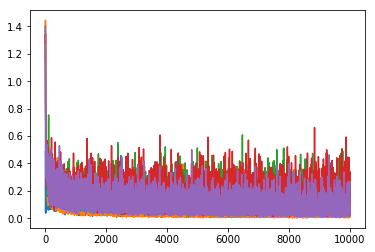

In [146]:
for i in range(5):
    plt.plot(loss_history[i])

In [147]:
# you may change your code in function `predict`
y_test_pred = np.array(classifier.predict(X_test_feats))
print(y_test_pred.shape)
print(y_test.shape)
print ("The accruacy socre is ", np.mean(y_test == y_test_pred))

(14000,)
(14000,)
The accruacy socre is  0.8825714285714286
